# Clustering drills

Welcome, traveller, you have arrived in the drills section of the clustering chapter. Here, you can practice some clustering techniques.

If you have not checked out the [example](./1.clustering_with_sklearn.ipynb), I advise you do so. We will use the same [pokemon](./assets/pokemon.csv) dataset to further our journey.

## 1. Multi-dimensional data

in the example, we wanted to determine the **most physically diverse** [pokemon](./assets/pokemon.csv) team there is. To do so, we clustered the pokemon into groups according to their **weight** and **height** using **k-means**.

Is this really the most diverse team out there though? The pokemon selected there are still similar in terms of **combat abilities**, and we have this data available.

For the first drill, I want you to:
   - cluster the pokemon into 6 groups according to similar:
       - height
       - weight
       - hp
       - attack
       - defense
       - speed
   - visualise these multidimensional clusters using a scatter plot matrix
   - determine the most dissimilar pokemon team from these clusters
   
So that you have **6-dimensional** clusters containing **diverse** pokemon groups from which you can determine your pokemon team similar to the method described in the example.

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

pokemon = pd.read_csv("./assets/pokemon.csv")
pokemon.head().T

,0,1,2,3,4
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
against_bug,1,1,1,0.5,0.5
against_dark,1,1,1,1,1
against_dragon,1,1,1,1,1
against_electric,0.5,0.5,0.5,1,1
against_fairy,0.5,0.5,0.5,0.5,0.5
against_fight,0.5,0.5,0.5,1,1
against_fire,2,2,2,0.5,0.5
against_flying,2,2,2,1,1
against_ghost,1,1,1,1,1


In [469]:
pokemon = pokemon.dropna(axis=0, subset=['weight_kg'])
pokemon = pokemon.dropna(axis=0, subset=['height_m'])

pokemon = pokemon.reset_index(drop=True)
# cluster your pokemon here

In [470]:
from sklearn.cluster import KMeans

team_size = 6

def cluster_dataframe(features):
    pokemon_metrics = pokemon[features[0]].to_frame()
    for n in range(1, len(features)):
        pokemon_metrics = pokemon_metrics.join(pokemon[features[n]].to_frame())
    return pokemon_metrics

pokemon_metrics = cluster_dataframe(["weight_kg", "height_m", "hp", "attack", "defense", "speed"])
pokemon_metrics_standardized = (pokemon_metrics - pokemon_metrics.mean()) / pokemon_metrics.std()
pokemon_metrics_standardized = pokemon_metrics_standardized.rename(columns={"weight_kg": "weight_zscore",
                                                                        "height_m":"height_zscore",
                                                                       "hp": "hp_zscore",
                                                                       "attack": "attack_zscore",
                                                                       "defense": "defense_zscore",
                                                                       "speed": "speed_zscore"})
pokemon_metrics_standardized


kmeans = KMeans(n_clusters=team_size, init="k-means++").fit(pokemon_metrics_standardized)

cluster_centers = kmeans.cluster_centers_

cluster_labels = pd.Series(kmeans.labels_, name="cluster")
pokemon_metrics_standardized = pokemon_metrics_standardized.join(cluster_labels.to_frame())
pokemon_metrics_standardized.T

,0,1,2,3,4,5,6,7,8,9,...,771,772,773,774,775,776,777,778,779,780
weight_zscore,-0.498178,-0.442396,0.353180,-0.483546,-0.387529,0.266307,-0.478974,-0.355523,0.220584,-0.534756,...,0.536071,-0.053753,2.489346,-0.332661,0.353180,8.582359,-0.560361,7.559084,1.541971,0.174861
height_zscore,-0.429400,-0.151706,0.773940,-0.521965,-0.059142,0.496246,-0.614530,-0.151706,0.403681,-0.799659,...,2.625232,0.033423,1.144198,0.588811,2.440103,7.438593,-0.799659,4.013702,1.144198,-0.151706
hp_zscore,-0.907100,-0.343650,0.407618,-1.132480,-0.418776,0.332491,-0.944663,-0.381213,0.370055,-0.907100,...,2.548730,1.496956,1.421829,0.069548,0.520308,1.046195,-0.381213,5.779180,1.046195,0.407618
attack_zscore,-0.890461,-0.487032,0.692223,-0.797362,-0.424966,0.816355,-0.921494,-0.455999,0.785322,-1.480089,...,1.095653,-0.766329,1.902511,1.840445,0.350860,0.723256,3.205898,0.723256,0.909454,0.537058
defense_zscore,-0.779152,-0.324695,1.622977,-0.973919,-0.487001,0.162223,-0.259773,0.227145,1.525593,-1.233609,...,0.519296,-0.844074,2.142356,-1.168686,-0.065006,0.973753,1.882666,-0.649307,0.908830,1.363287
speed_zscore,-0.736195,-0.217239,0.474702,-0.044254,0.474702,1.166643,-0.805389,-0.286433,0.405508,-0.736195,...,1.062851,1.270434,0.440105,2.931092,0.578493,-0.182642,1.478016,-0.805389,0.440105,-0.044254
cluster,3.000000,3.000000,2.000000,3.000000,3.000000,0.000000,3.000000,3.000000,2.000000,3.000000,...,5.000000,0.000000,5.000000,0.000000,4.000000,1.000000,0.000000,1.000000,5.000000,2.000000


In [471]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)

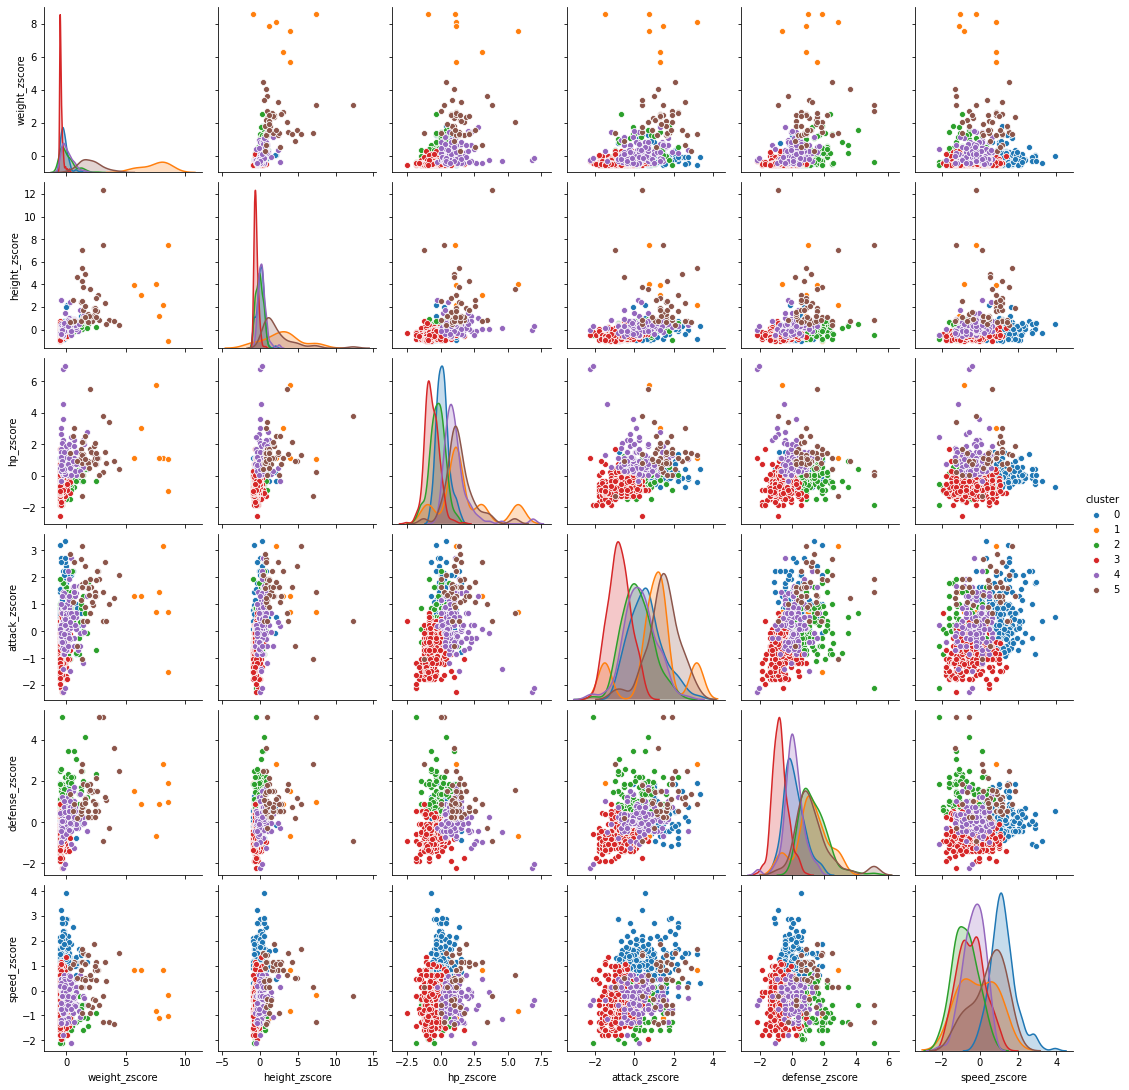

In [472]:
sns.pairplot(pokemon_metrics_standardized, hue="cluster", vars=["weight_zscore", "height_zscore", "hp_zscore", "attack_zscore", "defense_zscore", "speed_zscore"])

In [473]:
# determine your final pokemon here

In [474]:
def distance_to_other_clusters(pokemon):
    if not pokemon.loc[pokemon.isin(["weight_zscore", "hp_zscore", "hp_zscore", "attack_zscore", "defense_zscore", "speed_zscore"])].all():
        return
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['hp_zscore'], pokemon['attack_zscore'], pokemon['defense_zscore'], pokemon['speed_zscore']])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
chosen_pokemon

,weight_zscore,height_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
367,-0.005287,0.496246,-0.719283,0.537058,0.551757,3.934406,0,28.697924,Deoxys
776,8.582359,7.438593,1.046195,0.723256,0.973753,-0.182642,1,54.839508,Celesteela
194,-0.373812,-0.521965,-1.846184,-2.100749,5.096325,-2.120077,2,38.324486,Shuckle
330,-0.493605,-0.521965,-1.846184,-1.945584,-1.720527,0.474702,3,29.619596,Feebas
94,-0.244874,-0.059142,6.793391,-2.255914,-2.207445,-0.563210,4,42.863847,Chansey
302,3.078255,12.344519,3.788321,0.381893,-0.908997,-0.217239,5,64.546583,Wailord


## 2. Similarity criteria

Very nice! What a unique team!

You probably used the same **similarity criteria** as the introduction example. **k-means** uses Euclidean distance as a similarity criteria, so it makes sense that we also use Euclidean distance for our **dissimilarity criteria**, but what would happen if we picked something else?

"Woah, you're going too fast, 'Euclidean distance'? What do you mean by that?"

This is distance as we know it in the **real world**, a line connecting two points. But distance does not have to be defined this way in our **problem space**, it can be **Manhattan distance**, or **squared distance**, or something else entirely.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-10-8818-6_7/MediaObjects/463464_1_En_7_Fig2_HTML.jpg" align="center" width="600"/>

Replacing this similarity criteria for the `sklearn` k-means is no trivial task, so I will not ask this of you, but changing it for our **dissimilarity criteria** should be doable.

For the next exercise, I would like you to:
- replace the dissimilarity criteria from the example by:
    - manhattan distance
    - squared distance
    - 1/(squared distance)

In [475]:
# Assign dissimilarity to your pokemon here

## Manhattan

In [476]:
def distance_to_other_clusters_manhattan(pokemon):
    if not pokemon.loc[pokemon.isin(["weight_zscore", "hp_zscore", "hp_zscore", "attack_zscore", "defense_zscore", "speed_zscore"])].all():
        return
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['hp_zscore'], pokemon['attack_zscore'], pokemon['defense_zscore'], pokemon['speed_zscore']])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        #print(f"metric: {metric}, center: {center}")
        distance += sum(abs(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters_manhattan, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())
print(pokemon_processed.head())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
chosen_pokemon

   weight_zscore  height_zscore  hp_zscore  attack_zscore  defense_zscore  \
0      -0.498178      -0.429400  -0.907100      -0.890461       -0.779152   
1      -0.442396      -0.151706  -0.343650      -0.487032       -0.324695   
2       0.353180       0.773940   0.407618       0.692223        1.622977   
3      -0.483546      -0.521965  -1.132480      -0.797362       -0.973919   
4      -0.387529      -0.059142  -0.418776      -0.424966       -0.487001   

   speed_zscore  cluster  dissimilarity        name  
0     -0.736195        3      48.806730   Bulbasaur  
1     -0.217239        3      38.654791     Ivysaur  
2      0.474702        2      33.300830    Venusaur  
3     -0.044254        3      49.369740  Charmander  
4      0.474702        3      39.251266  Charmeleon  


,weight_zscore,height_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
777,-0.560361,-0.799659,-0.381213,3.205898,1.882666,1.478016,0,55.706029,Kartana
778,7.559084,4.013702,5.779180,0.723256,-0.649307,-0.805389,1,94.251593,Guzzlord
194,-0.373812,-0.521965,-1.846184,-2.100749,5.096325,-2.120077,2,80.013305,Shuckle
330,-0.493605,-0.521965,-1.846184,-1.945584,-1.720527,0.474702,3,62.998133,Feebas
94,-0.244874,-0.059142,6.793391,-2.255914,-2.207445,-0.563210,4,79.878389,Chansey
302,3.078255,12.344519,3.788321,0.381893,-0.908997,-0.217239,5,104.234305,Wailord


## squared

In [477]:
def distance_to_other_clusters_squared(pokemon):
    if not pokemon.loc[pokemon.isin(["weight_zscore", "hp_zscore", "hp_zscore", "attack_zscore", "defense_zscore", "speed_zscore"])].all():
        return
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['hp_zscore'], pokemon['attack_zscore'], pokemon['defense_zscore'], pokemon['speed_zscore']])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters_squared, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
chosen_pokemon

,weight_zscore,height_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
367,-0.005287,0.496246,-0.719283,0.537058,0.551757,3.934406,0,180.367800,Deoxys
776,8.582359,7.438593,1.046195,0.723256,0.973753,-0.182642,1,610.900632,Celesteela
194,-0.373812,-0.521965,-1.846184,-2.100749,5.096325,-2.120077,2,307.125058,Shuckle
330,-0.493605,-0.521965,-1.846184,-1.945584,-1.720527,0.474702,3,205.339091,Feebas
94,-0.244874,-0.059142,6.793391,-2.255914,-2.207445,-0.563210,4,374.072423,Chansey
302,3.078255,12.344519,3.788321,0.381893,-0.908997,-0.217239,5,839.831472,Wailord


## 1 / squared

In [478]:
def distance_to_other_clusters_squared2(pokemon):
    if not pokemon.loc[pokemon.isin(["weight_zscore", "hp_zscore", "hp_zscore", "attack_zscore", "defense_zscore", "speed_zscore"])].all():
        return
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['hp_zscore'], pokemon['attack_zscore'], pokemon['defense_zscore'], pokemon['speed_zscore']])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(1 / np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters_squared2, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
chosen_pokemon

,weight_zscore,height_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
215,0.089817,0.218552,0.144674,0.537058,-0.357156,0.647687,0,995365.446575,Stantler
729,7.851710,1.236763,1.158885,1.468049,0.876369,-1.082166,1,7639.339367,Mudsdale
727,-0.428679,-0.429400,-0.719283,-0.455999,2.564352,-1.082166,2,332480.182205,Toxapex
60,-0.145198,-0.244271,-1.094917,-1.169758,-1.233609,0.128731,3,586690.365269,Tentacool
317,-0.081186,1.421892,0.144674,0.692223,-0.422079,-0.044254,4,267747.082832,Seviper
467,3.279435,2.347539,1.534519,2.554205,1.200981,1.166643,5,5664.874796,Regigigas


Did your team change? Why do you think it did(n't)? Discuss this with one of your colleagues!

## 3. Heterogenous data

There! We did it! The most **diverse pokémon team** possible...or is it?

We have clustered our pokémon according to **weight** and **height** in the example, and according to **combat abilities** in the first drill, but what about **pokémon type**?

Some of the chosen pokémon may have the same type, as this data was ignored during clustering. But to get a really diverse team, we should take these into account!

For this drill I want you to:
- cluster the pokémon into 6 groups according to similar:
    - weight
    - height
    - primary pokémon type
    - secondary pokémon type
- determine the most dissimilar pokemon team from these clusters

But wait, these pokémon types, they're in **text format**, how do you compare these to the **numerical data**? It's time to **vectorize** this data. **Vectorizing** this textual data means representing this data in a way that can be understood by machine learning algorithms. 

For example, let's say there are only 3 pokémon types, and pokémon can only have one type. Vectorising a **grass**, **fire**, and **water** pokémon would look like this:
- grass -> [1, 0, 0]
- fire  -> [0, 1, 0]
- water -> [0, 0, 1]

So in this case, **3-dimensional** data. In our case though, we have a weight dimension, a height dimension, 18 primary and secondary dimensions, so a whopping **38 dimensions**

In [479]:
# vectorize your pokémon type data here (there are modules that vectorize data)

In [561]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
arr1 = vectorizer.fit_transform(pokemon["type1"])
vectorized_types1 = pd.DataFrame(data=arr1.toarray(), columns= vectorizer.get_feature_names())
vectorized_types1 = vectorized_types1.add_prefix("type1_")

arr2 = vectorizer.fit_transform(pokemon["type2"].values.astype(str))
vectorized_types2 = pd.DataFrame(data=arr2.toarray(), columns= vectorizer.get_feature_names())
vectorized_types2 = vectorized_types2.add_prefix("type2_")

vectorized_types = vectorized_types1.join(vectorized_types2)

vectorized_data = pokemon["weight_kg"].to_frame().join(pokemon["height_m"].to_frame())
vectorized_data.T



,0,1,2,3,4,5,6,7,8,9,...,771,772,773,774,775,776,777,778,779,780
weight_kg,6.9,13.0,100.0,8.5,19.0,90.5,9.0,22.5,85.5,2.9,...,120.0,55.5,333.6,25.0,100.0,999.9,0.1,888.0,230.0,80.5
height_m,0.7,1.0,2.0,0.6,1.1,1.7,0.5,1.0,1.6,0.3,...,4.0,1.2,2.4,1.8,3.8,9.2,0.3,5.5,2.4,1.0


In [481]:
# cluster your multi-dimensional pokémon data here

In [563]:

#

vectorized_data_standardized = (vectorized_data - vectorized_data.mean()) / vectorized_data.std()
vectorized_data_standardized = vectorized_data_standardized.add_suffix("_zscore")

vectorized_data_standardized = vectorized_data_standardized.join(vectorized_types)
kmeans_heterogenous = KMeans(n_clusters=team_size, init="k-means++").fit(vectorized_data_standardized)
cluster_centers = kmeans_heterogenous.cluster_centers_

cluster_labels = pd.Series(kmeans_heterogenous.labels_, name="cluster")
vectorized_data_standardized = vectorized_data_standardized.join(cluster_labels.to_frame())
vectorized_data_standardized.T

,0,1,2,3,4,5,6,7,8,9,...,771,772,773,774,775,776,777,778,779,780
weight_kg_zscore,-0.498178,-0.442396,0.35318,-0.483546,-0.387529,0.266307,-0.478974,-0.355523,0.220584,-0.534756,...,0.536071,-0.053753,2.489346,-0.332661,0.353180,8.582359,-0.560361,7.559084,1.541971,0.174861
height_m_zscore,-0.429400,-0.151706,0.77394,-0.521965,-0.059142,0.496246,-0.614530,-0.151706,0.403681,-0.799659,...,2.625232,0.033423,1.144198,0.588811,2.440103,7.438593,-0.799659,4.013702,1.144198,-0.151706
type1_bug,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
type1_dark,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
type1_dragon,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
type1_electric,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
type1_fairy,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
type1_fighting,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
type1_fire,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
type1_flying,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [564]:
# determine your unique team h# determine your unique team here
def distance_to_other_clusters(pokemon):
    metric = np.array([pokemon[x] for x in vectorized_data_standardized.columns[:-1]])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = vectorized_data_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = vectorized_data_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())
#print(pokemon_processed["dissimilarity"])

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
chosen_pokemon

,weight_kg_zscore,height_m_zscore,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,...,type2_nan,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water,cluster,dissimilarity,name
129,-0.410390,2.625232,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,22.264553,Dragonair
650,-0.560361,-0.984788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,24.505435,Flabébé
357,4.468227,0.403681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,25.930385,Metagross
776,8.582359,7.438593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,50.981800,Celesteela
722,-0.559446,-0.984788,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,25.010692,Cutiefly
302,3.078255,12.344519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,60.322692,Wailord


But wait, did you properly **normalize/standardize** your data? If you simply vectorize your data like in the example shown above, you might not get the results you want (try this for yourselves, what do you notice?).

The example standardizes its data using the **z-score**. What does this mean? z-score or mean standardization means we are using our **problem space** where our data lives optimally. 

in the case of the pokemon weight and height, it was clear to see the **order of magnitude** of the weight is larger than that of the height. During clustering, this would mean that **weight similarity would matter more than height similarity**, since the euclidian distance between points of data would be larger.

For example, A pokemon weighing 200kg and measuring 4m is about **as similar** as another pokémon weighing 100kg and measuring 2m in terms of both weight and height. But the euclidian difference in between the weight difference is 100(kg), while the difference of height is only 2(m). That is where normalization/standardization comes in handy. It scales these metrics so they can be compared fairly.

Which is why when we vectorize out **pokémon types** into vectors of length one, the **euclidian distance** between one pokémon type and the other is about 1.4 (thanks Pythagoras), which isn't that much compared to the weight and height difference.

Show me how you would **make sure** that **similarity or dissimilarity** of the **pokémon type** matters more than **weight or height**?

In [484]:
# standardize and scale your data in such a way that pokémon type similarity matters more than the other metrics

In [566]:
weight_value = 10

vectorized_data_standardized = (vectorized_data - vectorized_data.mean()) / vectorized_data.std()
vectorized_data_standardized = vectorized_data_standardized.add_suffix("_zscore")
vectorized_data_standardized = vectorized_data_standardized.join(vectorized_types)
vectorized_data_weighted = vectorized_data_standardized.iloc[:,:2].join(vectorized_data_standardized.iloc[:,2:] * weight_value)

kmeans_heterogenous2 = KMeans(n_clusters=team_size, init="k-means++").fit(vectorized_data_weighted)
cluster_centers = kmeans_heterogenous.cluster_centers_

cluster_labels = pd.Series(kmeans_heterogenous2.labels_, name="cluster")
vectorized_data_weighted = vectorized_data_weighted.join(cluster_labels.to_frame())

In [567]:
def distance_to_other_clusters(pokemon):
    metric = np.array([pokemon[x] for x in vectorized_data_weighted.columns[:-1]])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = vectorized_data_weighted.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = vectorized_data_weighted.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())
#print(pokemon_processed["dissimilarity"])

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
chosen_pokemon

,weight_kg_zscore,height_m_zscore,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,...,type2_nan,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water,cluster,dissimilarity,name
576,-0.555788,-0.984788,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,75.714375,Joltik
776,8.582359,7.438593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,82.714462,Celesteela
302,3.078255,12.344519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2,88.651086,Wailord
769,8.582359,-0.984788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3,81.916262,Cosmoem
734,-0.547558,-0.892223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,75.738328,Morelull
189,3.096544,7.438593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,79.662936,Steelix


## 4. Cluster method comparison

I hope you're getting a bit more comfortable with the **k-means** method, it sure is a popular one, but it's [not the only clustering technique](https://scikit-learn.org/stable/modules/clustering.html) out there!

For this excercise, I want you to:
- pick 3 clustering techniques from the `scikit-learn` library
- cluster the pokémon according weight and height
- try to adjust the cluster method arguments so 6 clusters are obtained after clustering
- evaluate in-cluster similarity and cluster-to-cluster similarity:
  - compare every pokémon in a cluster to every other pokémon within that same cluster (choose your own similarity criteria)
  - take the average of these in-cluster similarities
  - do this for every cluster
  - take the the average or centroid of ever cluster, and determine the similarity to every other cluster
  - compare these two metrics (in-cluster similarity and cluster-to-cluster similarity) for every chosen clustering technique
  - determine the 'best' technique by maximising in-cluster similarity and minimizing cluster-to-cluster similarity
- visualize the results

Bonus: track these metrics for every iteration of the algorithms and plot the progression from start to finish

## Affinity Propagation

In [487]:

from sklearn.cluster import AffinityPropagation

def distance_to_other_clusters(pokemon):
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore']])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance



In [ ]:
pokemon_metrics = cluster_dataframe(["weight_kg", "height_m"])
pokemon_metrics_standardized = (pokemon_metrics - pokemon_metrics.mean()) / pokemon_metrics.std()
pokemon_metrics_standardized = pokemon_metrics_standardized.add_suffix("_zscore")

affinity = AffinityPropagation(preference=-40, verbose=True, random_state=0, damping=0.9).fit(pokemon_metrics_standardized)
affinity_clusters = affinity.cluster_centers_

def check_in_cluster_similarity(pokemon, size=6):
    distance_history = np.zeros(size)
    for n in range(0, size):
        cluster = pokemon.loc[pokemon["cluster"] == n]
        
        metric = np.array([cluster["weight_kg_zscore"], cluster["height_m_zscore"]])
        center = affinity_clusters[n]
        distance = 0
        for m in metric.T:
            distance += np.sqrt(sum(np.square(m - center)))
        distance_history[n] = distance / metric.shape[1]
    return distance_history
    

affinity_labels = pd.Series(affinity.labels_, name= "cluster")
pokemon_metrics_standardized1 = pokemon_metrics_standardized.join(affinity_labels.to_frame())
result_affinity = check_in_cluster_similarity(pokemon_metrics_standardized1)

Converged after 56 iterations.


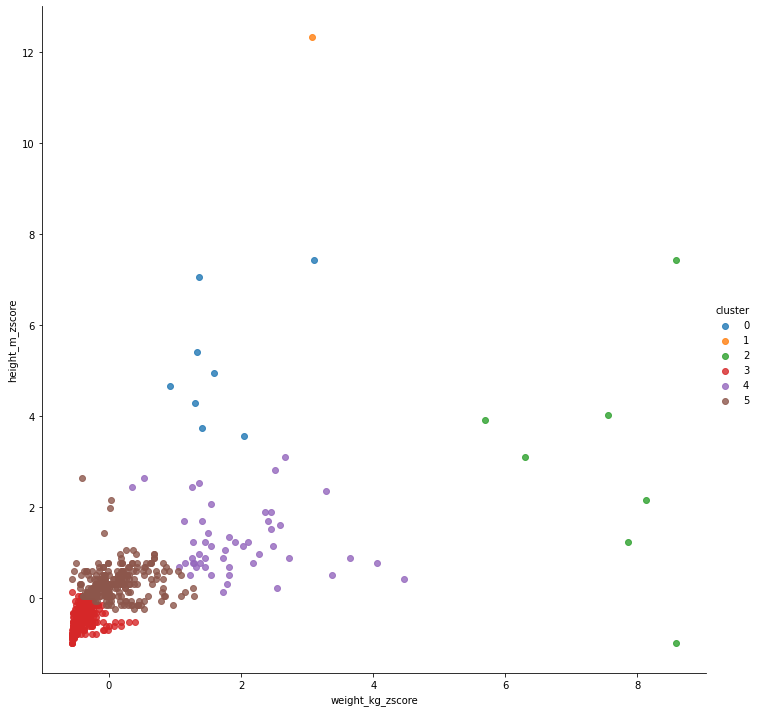

In [544]:
pokemon_metrics = cluster_dataframe(["weight_kg", "height_m"])
pokemon_metrics_standardized = (pokemon_metrics - pokemon_metrics.mean()) / pokemon_metrics.std()
pokemon_metrics_standardized = pokemon_metrics_standardized.add_suffix("_zscore")

affinity = AffinityPropagation(preference=-40, verbose=True, random_state=0, damping=0.9).fit(pokemon_metrics_standardized)
affinity_clusters = affinity.cluster_centers_

def check_in_cluster_similarity(pokemon, size=6):
    distance_history = np.zeros(size)
    for n in range(0, size):
        cluster = pokemon.loc[pokemon["cluster"] == n]
        
        metric = np.array([cluster["weight_kg_zscore"], cluster["height_m_zscore"]])
        center = affinity_clusters[n]
        distance = 0
        for m in metric.T:
            distance += np.sqrt(sum(np.square(m - center)))
        distance_history[n] = distance / metric.shape[1]
    return distance_history
    

affinity_labels = pd.Series(affinity.labels_, name= "cluster")
pokemon_metrics_standardized1 = pokemon_metrics_standardized.join(affinity_labels.to_frame())
result_affinity = check_in_cluster_similarity(pokemon_metrics_standardized1)

sns.lmplot(x='weight_kg_zscore', y='height_m_zscore',  height=10, data=pokemon_metrics_standardized1, 
           fit_reg=False, hue='cluster')

Text(0.5, 1.0, 'Affinity Propagation')

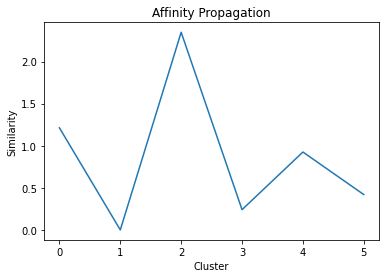

In [545]:
plt.plot(result_affinity)
plt.ylabel("Similarity")
plt.xlabel("Cluster")
plt.title("Affinity Propagation")

In [627]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

def calculate_silhouette(X, label):
    return silhouette_score(X, label)

silhouette_affinity = calculate_silhouette(pokemon_metrics_standardized, affinity.labels_)
silhouette_affinity

def calculate_calinski_score(X, label):
    return calinski_harabasz_score(X, label)

calinski_affinity = calculate_calinski_score(pokemon_metrics_standardized, affinity.labels_)

def calculate_davies_score(X, labels):
    return davies_bouldin_score(X, labels)
    
davies_affinity = calculate_davies_score(pokemon_metrics_standardized, affinity.labels_)

Text(0.5, 1.0, 'Cluster to cluster similarity')

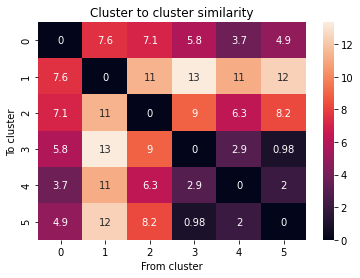

In [546]:

def check_cluster_to_cluster(clustering):
    clusters = np.zeros((6,6))
    for m in range(len(clustering)):
        for c in range(len(clustering)):
            value = np.square(clustering[m] - clustering[c])            
            if clustering.ndim > 1:
                clusters[m][c] = np.sqrt(sum(value))
            else:
                clusters[m][c] = np.sqrt(value)
    return clusters

affinity_propagation_similarity = check_cluster_to_cluster(affinity_clusters)
sns.heatmap(affinity_propagation_similarity, annot=True)
plt.ylabel("To cluster")
plt.xlabel("From cluster")
plt.title("Cluster to cluster similarity")

## Spectral Clustering

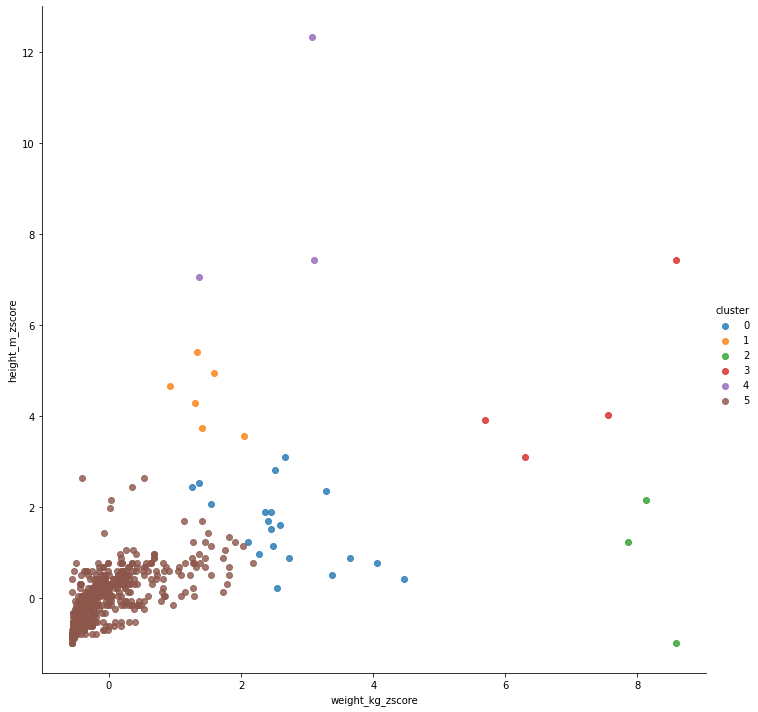

In [514]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=6, random_state = 0, affinity="rbf", n_init=100, assign_labels="discretize")
sc_cluster_labels = sc.fit_predict(pokemon_metrics_standardized)
sc_labels = pd.Series(sc_cluster_labels, name="cluster")

pokemon_metrics_standardized2 = pokemon_metrics_standardized.join(sc_labels.to_frame())
result_spectral = check_in_cluster_similarity(pokemon_metrics_standardized2)

sns.lmplot(x='weight_kg_zscore', y='height_m_zscore',  height=10, data=pokemon_metrics_standardized2, 
           fit_reg=False, hue='cluster')

Text(0.5, 1.0, 'Spectral Clustering')

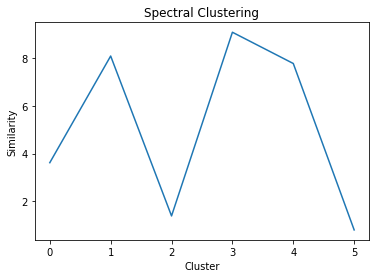

In [510]:
plt.plot(result_spectral)
plt.ylabel("Similarity")
plt.xlabel("Cluster")
plt.title("Spectral Clustering")

In [628]:
spectral_silhouette = calculate_silhouette(pokemon_metrics_standardized, sc_cluster_labels)
spectral_silhouette

spectral_calinski = calculate_calinski_score(pokemon_metrics_standardized, sc_cluster_labels)

spectral_davies = calculate_davies_score(pokemon_metrics_standardized, sc_cluster_labels)

Text(0.5, 1.0, 'Cluster to cluster similarity')

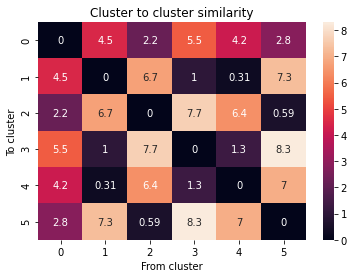

In [504]:
spectral_clustering_similarity = check_cluster_to_cluster(result_spectral)
sns.heatmap(spectral_clustering_similarity, annot=True)
plt.ylabel("To cluster")
plt.xlabel("From cluster")
plt.title("Cluster to cluster similarity")

## Birch

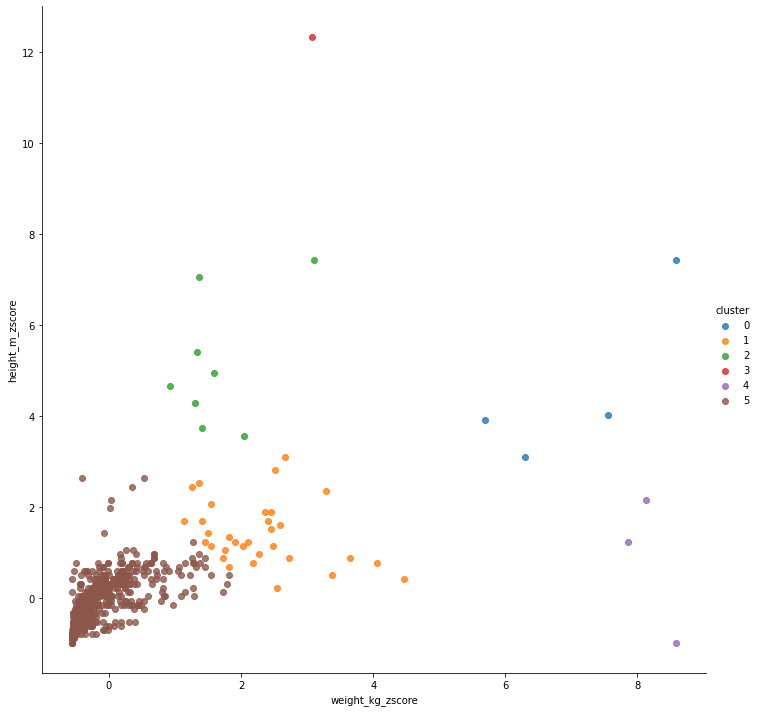

In [528]:
from sklearn.cluster import Birch

birch_labels = Birch(n_clusters=6).fit_predict(pokemon_metrics_standardized)
birch_clusters = pd.Series(birch_labels, name="cluster")

pokemon_metrics_standardized3 = pokemon_metrics_standardized.join(birch_clusters.to_frame())
result_birch = check_in_cluster_similarity(pokemon_metrics_standardized3)

sns.lmplot(x='weight_kg_zscore', y='height_m_zscore',  height=10, data=pokemon_metrics_standardized3, 
           fit_reg=False, hue='cluster')

Text(0.5, 1.0, 'Birch Clustering')

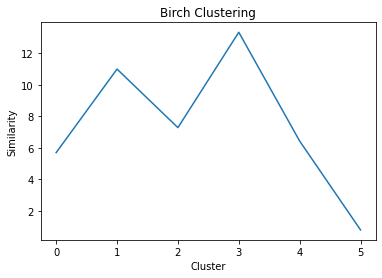

In [529]:
plt.plot(result_birch)
plt.ylabel("Similarity")
plt.xlabel("Cluster")
plt.title("Birch Clustering")

In [629]:
birch_silhouette = calculate_silhouette(pokemon_metrics_standardized, birch_labels)
birch_silhouette

birch_calinski = calculate_calinski_score(pokemon_metrics_standardized, birch_labels)

birch_davies = calculate_davies_score(pokemon_metrics_standardized, birch_labels)

Text(0.5, 1.0, 'Cluster to cluster similarity')

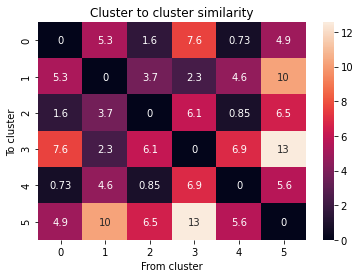

In [630]:
birch_clustering_similarity = check_cluster_to_cluster(result_birch)
sns.heatmap(birch_clustering_similarity, annot=True)
plt.ylabel("To cluster")
plt.xlabel("From cluster")
plt.title("Cluster to cluster similarity")

7.116728448573639


Text(0.5, 1.0, 'Clustering method comparison')

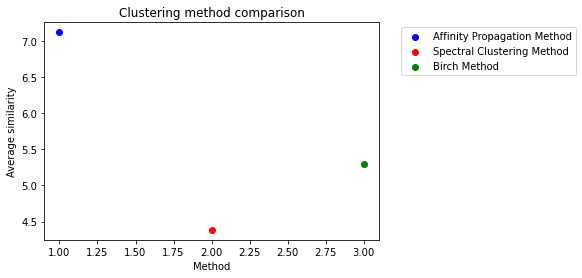

In [607]:
def average_cluster_similarity(matrix):
    division_factor = matrix.shape[0]**2 - matrix.shape[0] 
    return sum(sum(matrix)) / division_factor


plt.scatter(1, average_cluster_similarity(affinity_propagation_similarity), color="blue", label="Affinity Propagation Method")
plt.scatter(2, average_cluster_similarity(spectral_clustering_similarity), color="red", label="Spectral Clustering Method")
plt.scatter(3, average_cluster_similarity(birch_clustering_similarity), color="green", label="Birch Method")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.xlabel("Method")
plt.ylabel("Average similarity")
plt.title("Clustering method comparison")

[1.21278038 0.         2.34806804 0.24046896 0.92521318 0.41974479]


Text(0.5, 1.0, 'In cluster similarity')

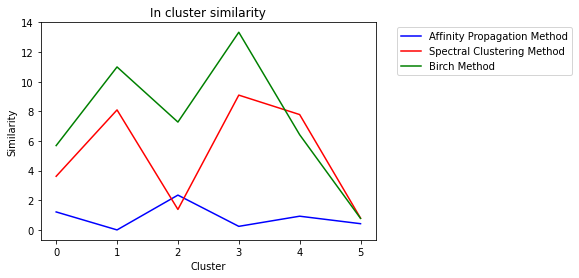

In [606]:

plt.plot(result_affinity, color="blue", label="Affinity Propagation Method")
plt.plot(result_spectral, color="red", label="Spectral Clustering Method")
plt.plot(result_birch, color="green", label="Birch Method")

plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

plt.ylabel("Similarity")
plt.xlabel("Cluster")
plt.title("In cluster similarity")

## Metric comparisons

### Silhouette score

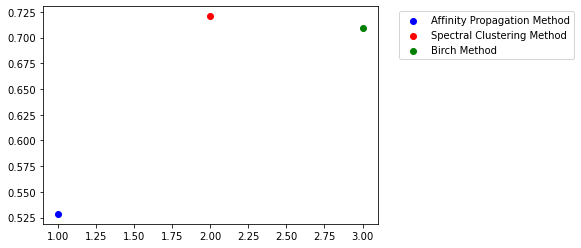

In [609]:
plt.scatter(1, silhouette_affinity, color="blue", label="Affinity Propagation Method")
plt.scatter(2, spectral_silhouette, color="red", label="Spectral Clustering Method")
plt.scatter(3, birch_silhouette, color="green", label="Birch Method")

plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

### Calinski Harabasz Score

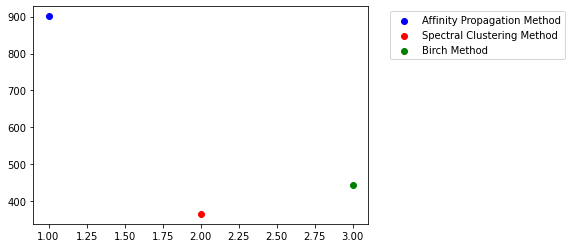

In [610]:
plt.scatter(1, calinski_affinity, color="blue", label="Affinity Propagation Method")
plt.scatter(2, spectral_calinski, color="red", label="Spectral Clustering Method")
plt.scatter(3, birch_calinski, color="green", label="Birch Method")

plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

### Davies Bouldin Score

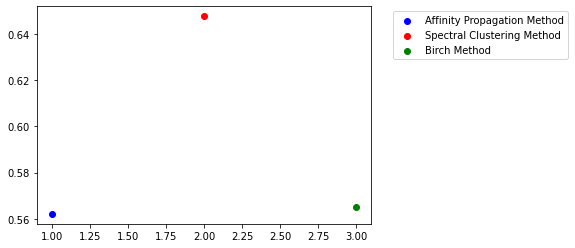

In [631]:
plt.scatter(1, davies_affinity, color="blue", label="Affinity Propagation Method")
plt.scatter(2, spectral_davies, color="red", label="Spectral Clustering Method")
plt.scatter(3, birch_davies, color="green", label="Birch Method")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))